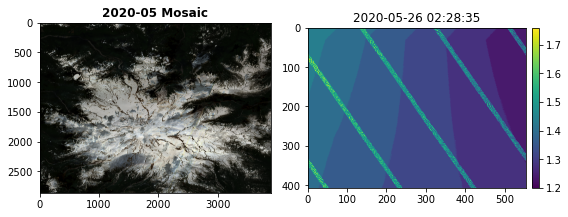

In [4]:
import earthpy.plot as ep
import rasterio as rio
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio.plot as plot
import cv2
import cv2

def normalize(x):
    return ((x - np.nanmin(x)) * (1/(np.nanmax(x) - np.nanmin(x)) * 255)).astype('uint8')

imdir = '/Users/corey/Documents/GitHub/jpl_msp_2020/data/ecostress_mt_rainier'
s2_imdir = '/Users/corey/Google Drive/sentinel_2_rainier'

err = rio.open(os.path.join(imdir, 'ECO2LSTE.001_SDS_LST_err_doy2020147022835_aid0001.tif'))
s2 = rio.open(os.path.join(s2_imdir, '2020-05-01T00:00:00.tif'))

bands = {}

for b in [1,2,3]:
    band = np.nan_to_num(s2.read(b))
    bands["band{0}".format(b)] = normalize(band) # preprocessing.normalize(i,'l1', axis=0)
rgb = np.stack([bands['band1'], bands['band2'], bands['band3']])

date = pd.to_datetime('2020147022835', format='%Y%j%H%M%S')

fig, ax = plt.subplots(1,2, figsize=(8, 6))

plot.show(rgb, ax=ax[0], title='2020-05 Mosaic')

im = ax[1].imshow(err.read(1)*0.04)
plt.title(str(date))
ep.colorbar(im)
plt.tight_layout()

#plt.savefig('/Users/corey/Documents/GitHub/jpl_msp_2020/figures/LST_error_example.tif', dpi=300)

In [5]:

band5 = rio.open('/Users/corey/Documents/GitHub/jpl_msp_2020/data/ecostress_mt_rainier/ECO2LSTE.001_SDS_Emis5_doy2019161204924_aid0001.tif')
qc = rio.open('/Users/corey/Documents/GitHub/jpl_msp_2020/data/ecostress_mt_rainier/ECO2LSTE.001_SDS_QC_doy2019161204924_aid0001.tif')

In [6]:
mask = qc.read(1)
b5_read = band5.read(1)

In [19]:
flag1 = 2**3
flag2 = 2**2

In [20]:
good_data = (((np.bitwise_and(mask, flag2) == 0) & (np.bitwise_and(mask, flag1) == 0)) == False).astype('int')
striped = (np.bitwise_and(mask, flag2) == 0) & (np.bitwise_and(mask, flag1) == 1)
bad_data = (np.bitwise_and(mask, flag2) == 1) & (np.bitwise_and(mask, flag1) == 1)
cv2.imwrite('test_good_data.png', good_data)
masked = cv2.imread('test_good_data.png', 0)

In [21]:
        # alg 1 : cv2.INPAINT_TELEA ; alg 2 : cv2.INPAINT_NS
dst = cv2.inpaint(b5_read,masked,3,cv2.INPAINT_NS) # Magic happen here!

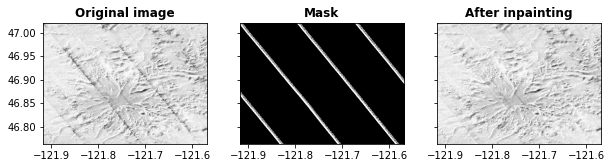

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(10, 6), sharey=True)

plot.show(dst, title='After inpainting', transform = qc.transform, ax=ax[2], cmap='Greys_r')
plot.show(masked, title='Mask', transform = qc.transform, ax=ax[1], cmap='Greys_r', vmin=0, vmax=1)
plot.show(b5_read, title='Original image', transform = qc.transform, ax=ax[0], cmap='Greys_r')
#plt.savefig('/Users/corey/Documents/GitHub/jpl_msp_2020/figures/destriping_example.png', dpi=400)